In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

In [2]:
%matplotlib inline


In [3]:
emerg = pd.read_csv('911.csv')
emerg

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/15 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/15 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/15 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/15 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/15 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
65530,40.248278,-75.654865,CHESTNUT ST & MANATAWNY ST; POTTSTOWN; Statio...,19464.0,EMS: BACK PAINS/INJURY,5/30/16 12:01,POTTSTOWN,CHESTNUT ST & MANATAWNY ST,1
65531,40.241171,-75.615558,HILLSIDE DR & QUEEN ST; POTTSTOWN; Station 32...,19464.0,EMS: FALL VICTIM,5/30/16 12:08,POTTSTOWN,HILLSIDE DR & QUEEN ST,1
65532,40.325806,-75.615457,VILLAGE GREEN DR & BARTMAN AVE; DOUGLASS; Sta...,19525.0,EMS: FALL VICTIM,5/30/16 12:10,DOUGLASS,VILLAGE GREEN DR & BARTMAN AVE,1
65533,40.229008,-75.387853,JONES RD & EVERGREEN LN; CHESTER COUNTY; Stat...,NaN,EMS: CVA/STROKE,5/30/16 12:16,CHESTER COUNTY,JONES RD & EVERGREEN LN,1


# Exploratory data analysis 

In [10]:
emerg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 9 columns):
lat          65535 non-null float64
lng          65535 non-null float64
desc         65535 non-null object
zip          57414 non-null float64
title        65535 non-null object
timeStamp    65535 non-null object
twp          65514 non-null object
addr         65535 non-null object
e            65535 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.5+ MB


In [11]:
emerg.describe()

,lat,lng,zip,e
count,65535.000000,65535.000000,57414.000000,65535.0
mean,40.160487,-75.318042,19237.571794,1.0
std,0.090996,0.162583,288.306185,0.0
min,32.387090,-86.276106,17752.000000,1.0
25%,40.101330,-75.394827,19038.000000,1.0
50%,40.145790,-75.306073,19401.000000,1.0
75%,40.229961,-75.212916,19446.000000,1.0
max,41.167156,-74.995041,36107.000000,1.0


In [12]:
emerg.isnull().sum()

lat             0
lng             0
desc            0
zip          8121
title           0
timeStamp       0
twp            21
addr            0
e               0
dtype: int64

In [13]:
emerg["lat"].value_counts()

40.097222    991
40.229008    670
40.133037    633
40.024967    541
40.172314    339
            ... 
40.068742      1
40.243474      1
40.112051      1
40.150487      1
40.336143      1
Name: lat, Length: 12453, dtype: int64

In [14]:
emerg["lng"].value_counts()

-75.376195    991
-75.387853    670
-75.408463    633
-75.282905    617
-75.236238    440
             ... 
-75.288297      1
-75.507957      1
-75.590954      1
-75.237326      1
-75.331166      1
Name: lng, Length: 12459, dtype: int64

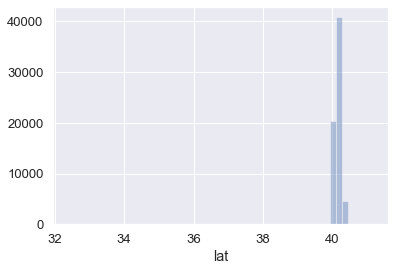

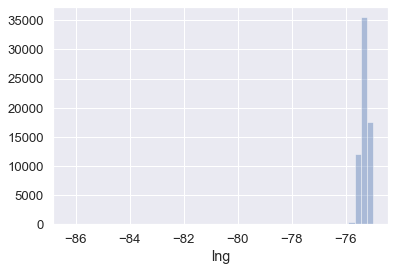

In [15]:
list1 = ["lat","lng"]

for x in list1:
    sns.distplot(emerg[x],kde= False,color="b")
    plt.show()

## Data Visulizations: 

# it can be seen from the distribution plots of lat and lng, most of the values are concentracted around the value 40 for lat and concentrated around the value -75 for the lng

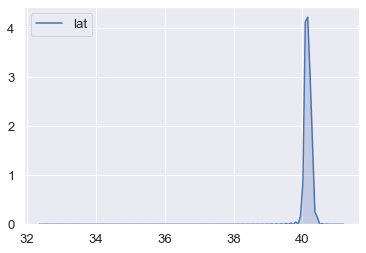

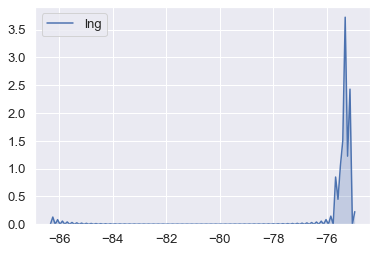

In [16]:
list1 = ["lat","lng"]

for x in list1:
    sns.kdeplot(emerg[x],shade=True,color="b")
    plt.show()

# In the upcoimg cells, there is some data pre_processing was done like spearting the "timestamp" feature into hours, days, months and years. Additionally, the "title" feature was splitted into the main emergency and after that the elaboration. All of the new columns were added latter on 

In [4]:
emerg['timeStamp'] = pd.to_datetime(emerg['timeStamp'], infer_datetime_format=True)

In [5]:
emerg['timeStamp'].head()

0   2015-12-10 17:10:00
1   2015-12-10 17:29:00
2   2015-12-10 14:39:00
3   2015-12-10 16:47:00
4   2015-12-10 16:56:00
Name: timeStamp, dtype: datetime64[ns]

In [6]:
emerg['year'] = emerg['timeStamp'].dt.year

In [7]:
emerg['month'] = emerg['timeStamp'].dt.month_name()

In [8]:
emerg['day'] = emerg['timeStamp'].dt.day_name()


In [9]:
emerg['hour'] = emerg['timeStamp'].dt.hour

In [1]:
def separator(x):
    x = x.split(':')
    x = x[0]
    return x

In [2]:
emerg['emergency_type'] = emerg['title'].apply(separator)

NameError: name 'emerg' is not defined

In [3]:
new = emerg["title"].str.split(" ", n = 1, expand = True) 

NameError: name 'emerg' is not defined

In [13]:
emerg["call_type"]= new[0] 


In [14]:
emerg

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,day,hour,emergency_type,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,December,Thursday,17,BACK PAINS/INJURY,EMS:
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,December,Thursday,17,DIABETIC EMERGENCY,EMS:
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,2015,December,Thursday,14,GAS-ODOR/LEAK,Fire:
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,December,Thursday,16,CARDIAC EMERGENCY,EMS:
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,December,Thursday,16,DIZZINESS,EMS:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,40.248278,-75.654865,CHESTNUT ST & MANATAWNY ST; POTTSTOWN; Statio...,19464.0,EMS: BACK PAINS/INJURY,2016-05-30 12:01:00,POTTSTOWN,CHESTNUT ST & MANATAWNY ST,1,2016,May,Monday,12,BACK PAINS/INJURY,EMS:
65531,40.241171,-75.615558,HILLSIDE DR & QUEEN ST; POTTSTOWN; Station 32...,19464.0,EMS: FALL VICTIM,2016-05-30 12:08:00,POTTSTOWN,HILLSIDE DR & QUEEN ST,1,2016,May,Monday,12,FALL VICTIM,EMS:
65532,40.325806,-75.615457,VILLAGE GREEN DR & BARTMAN AVE; DOUGLASS; Sta...,19525.0,EMS: FALL VICTIM,2016-05-30 12:10:00,DOUGLASS,VILLAGE GREEN DR & BARTMAN AVE,1,2016,May,Monday,12,FALL VICTIM,EMS:
65533,40.229008,-75.387853,JONES RD & EVERGREEN LN; CHESTER COUNTY; Stat...,NaN,EMS: CVA/STROKE,2016-05-30 12:16:00,CHESTER COUNTY,JONES RD & EVERGREEN LN,1,2016,May,Monday,12,CVA/STROKE,EMS:


# After applying the boxplots for the lat and lng over the data across the days, the analysis revelied the fact that the values are concentarted around the 40 for lat and around -75. Additionally, any number less or more than 40 is considered as an outlier for the lat, while for the lng any number below the -75 is considered as an outlier as well. 

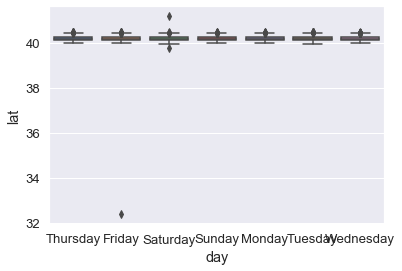

In [28]:
sns.boxplot(x="day", y="lat", data=emerg)


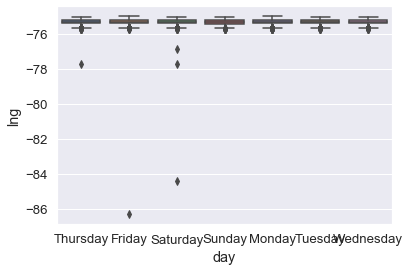

In [29]:
sns.boxplot(x="day", y="lng", data=emerg)

In [30]:
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.2)

# Here it comes the interesting part ! 

# In the following countplot graph, the major 911 emergency is the vechile accident, which is anticipated to occur in people's daily lives while going and returning back from work and so on 

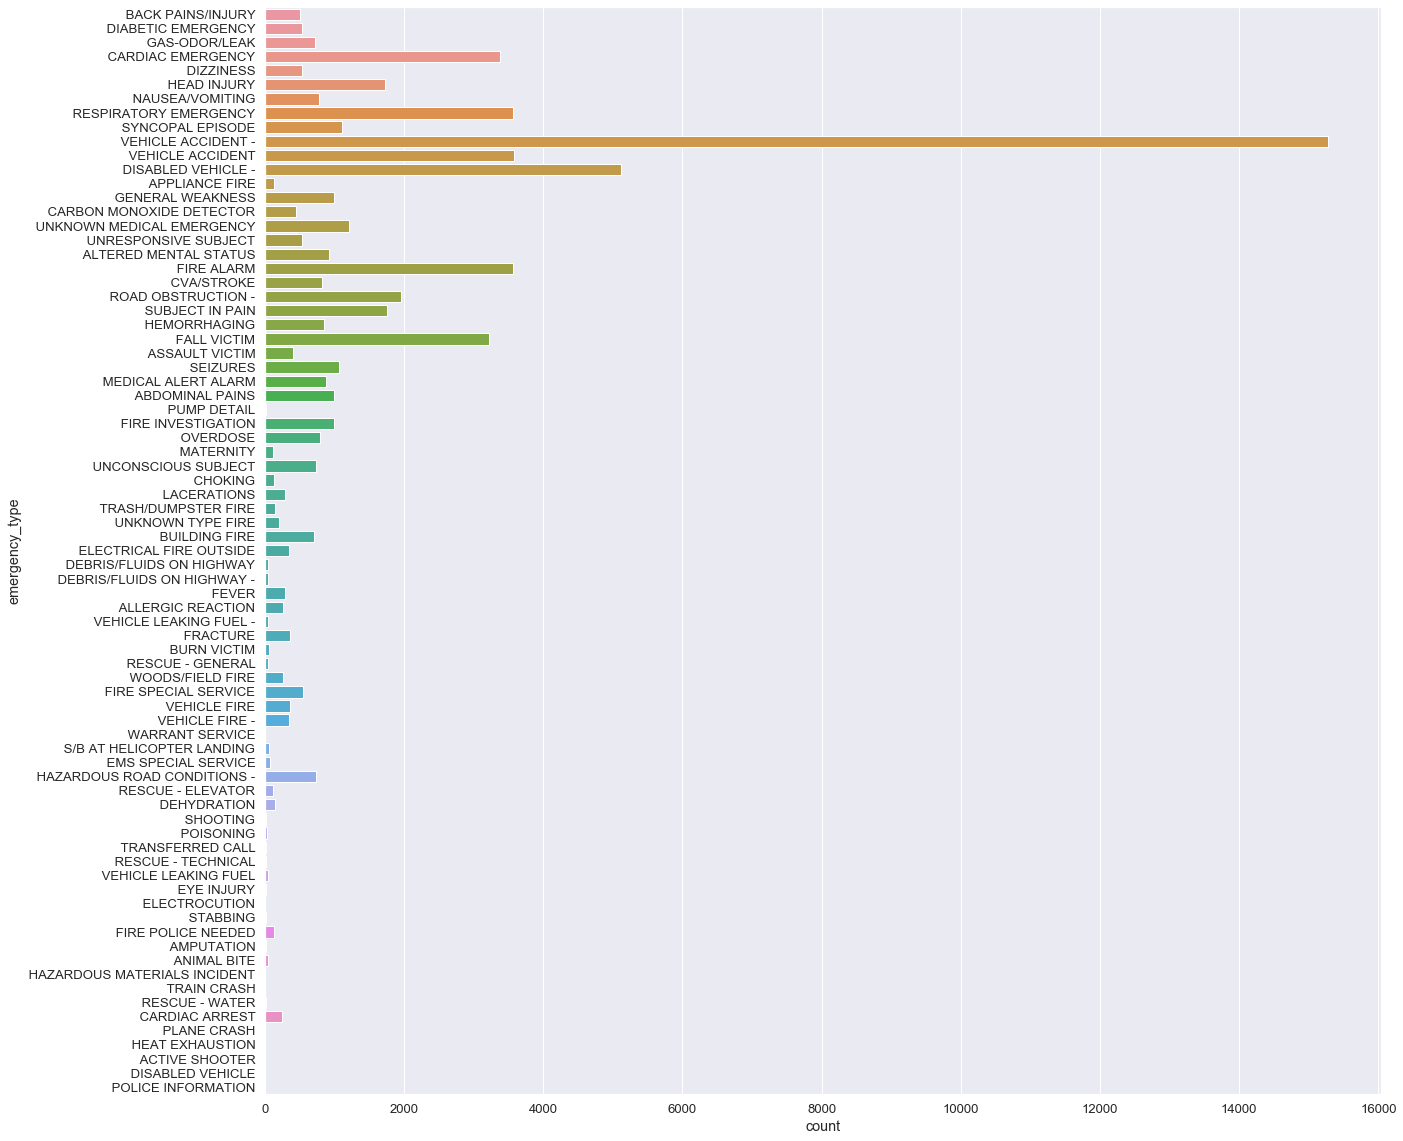

In [31]:
sns.countplot(y='emergency_type', data=emerg)

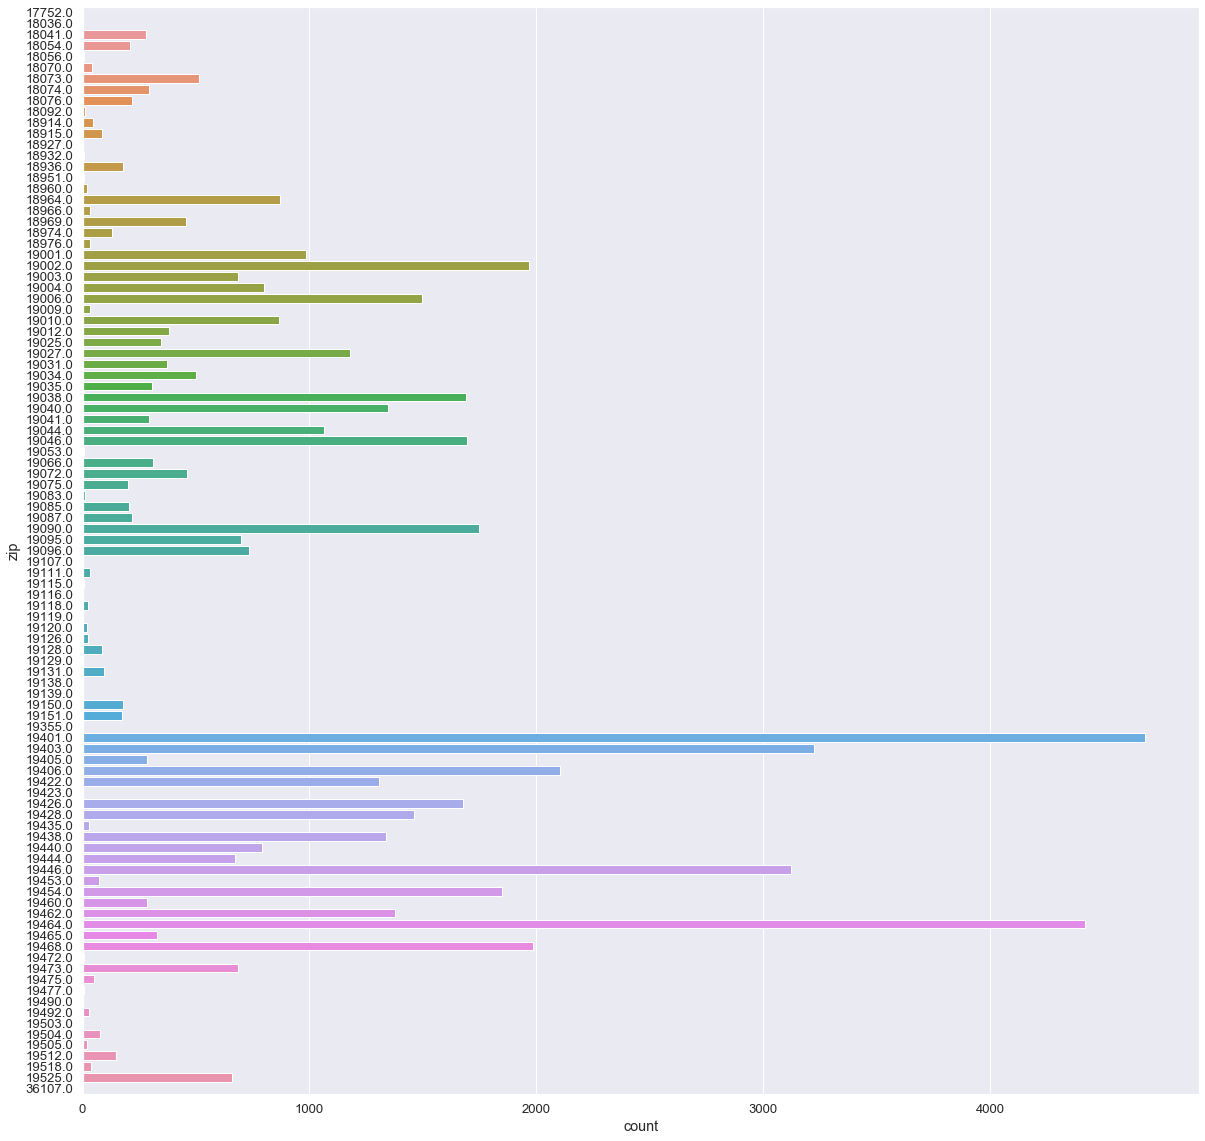

In [34]:
sns.countplot(y='zip', data=emerg) # it seems here the region of the zip number 1941 is the most likely region to include accidents

In [96]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

# By sperating the title into the major 911 emergency, it can be told that EMS is the major call type. Note worthy, after some tiny research, it was found that the EMS is the shortage of the emergnecy medical service and the least 911 emergnecy to occure is the fire. 

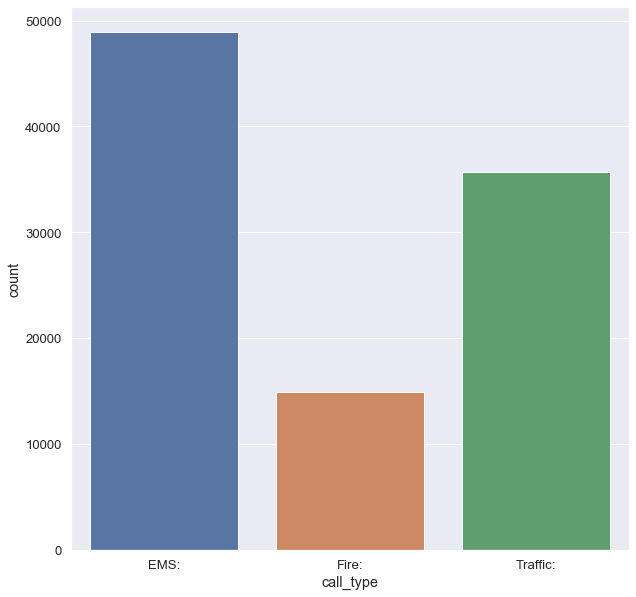

In [97]:
sns.countplot(x='call_type', data=emerg)

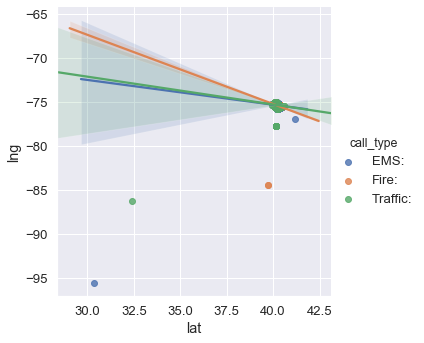

In [98]:
sns.lmplot(x='lat', y='lng', data=emerg, hue='call_type')

# I found it a nice idea to find which month excatly contributes the most to the 911 emergency, and it seems the January month is. A kind of a logical reason is that in January weather is so cold and snowy, so due to the bad weather conditions, traffic accidents take place. Also maybe in January, the cold weather casues health issues after being infected with influenzia for instance 

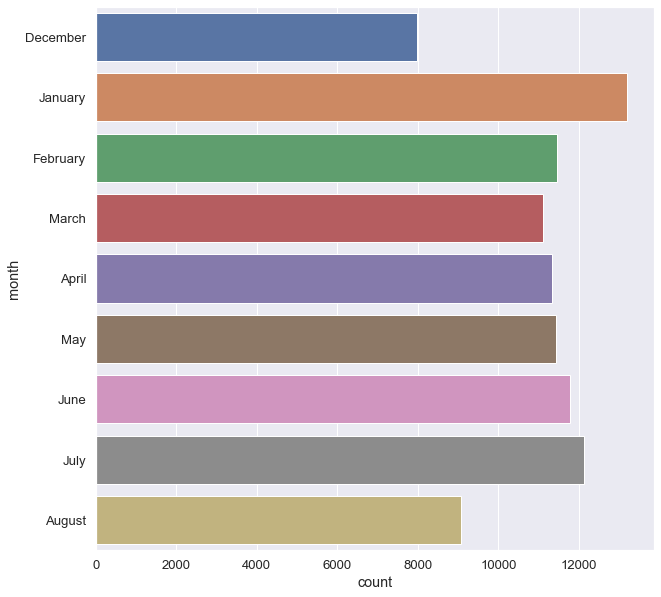

In [99]:
sns.countplot(y='month', data=emerg)

# Thus, I plotted the months across the months, and it seems the results are really close to what I have expected that January has the highest number of Traffic emergnecy and the highest EMS. Worth noticing, July has the following EMS, maybe it is related to practing swimming in the sea or in the swiiming pools, so maybe some people were exposed to get drowing 

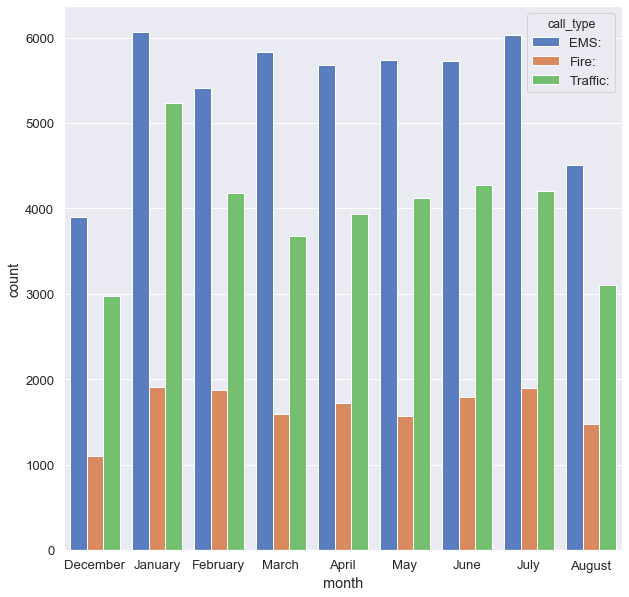

In [101]:
sns.countplot(x='month', data=emerg, hue='call_type', palette='muted')

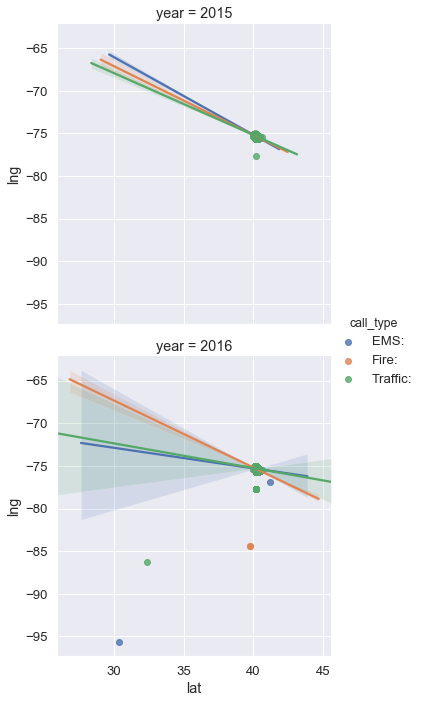

In [39]:
sns.lmplot(x='lat', y='lng', data=emerg, hue='call_type',row="year")

# Also the data visulization has revelied the fact that most of the 911 emergency cases took  place in the year 2016

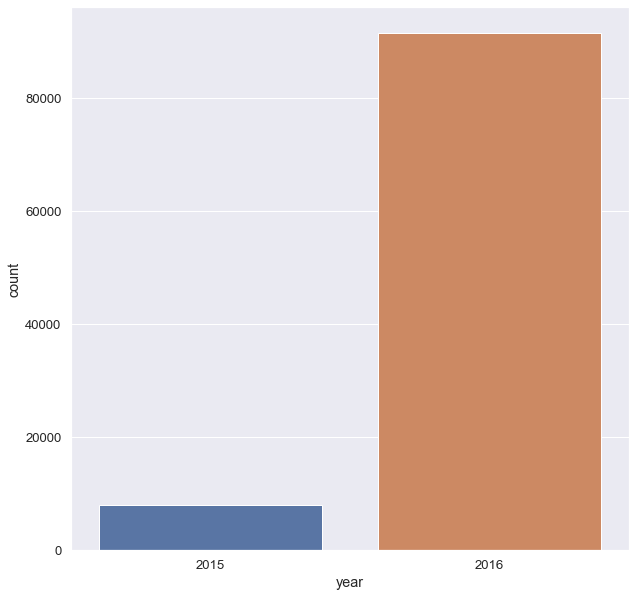

In [102]:
sns.countplot(x='year', data=emerg)

In [103]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

# Another approach that seemed good to take is to examine which hour exactly the accidents occur most. Therefore, it seems from the following gragh that the hour 16 (4 pm) and the 17 (5 pm) have the highest number of accidents. Frankly, it is quite normal since there are many people are returing back from their works after a long time of work. Hereby, they may be a little bit sleepy at 4 and 5 pm 

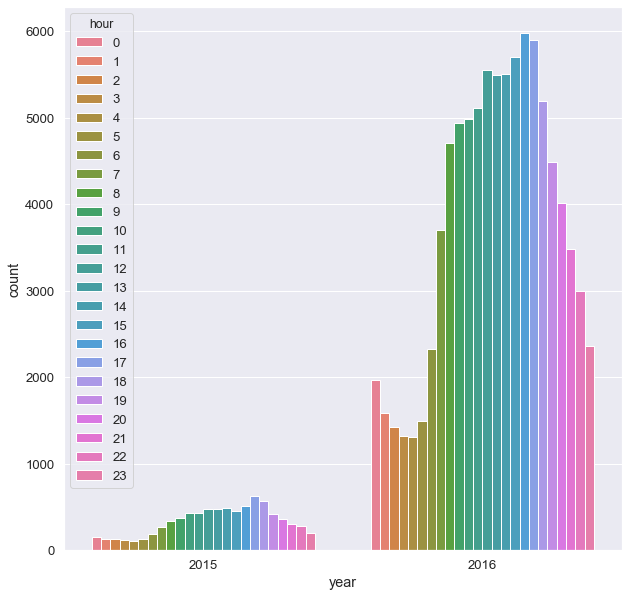

In [53]:
sns.countplot(x='year', data=emerg, hue='hour', palette='husl')

## The previous analysis seems to hold, since the tarrifc accidents occur the most at the 16 (4pm ) and 17 (5 pm)

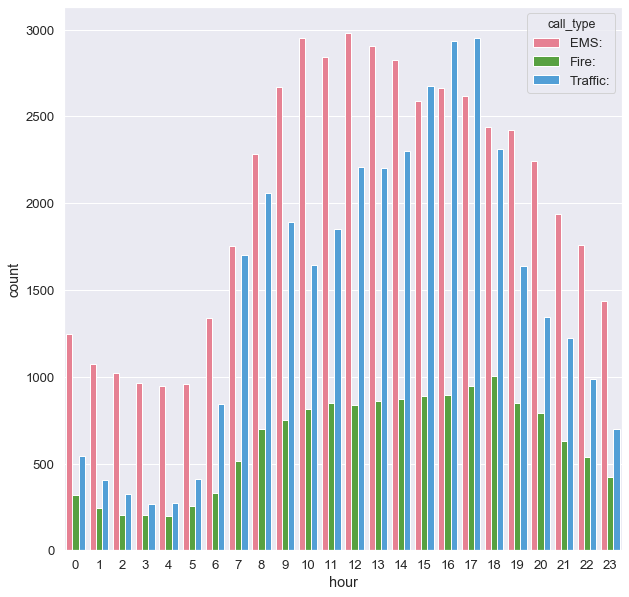

In [104]:
sns.countplot(x='hour', data=emerg, hue='call_type', palette='husl')

# Giving more insights, the total accidents in the year 2015 occured in only one month which is December.

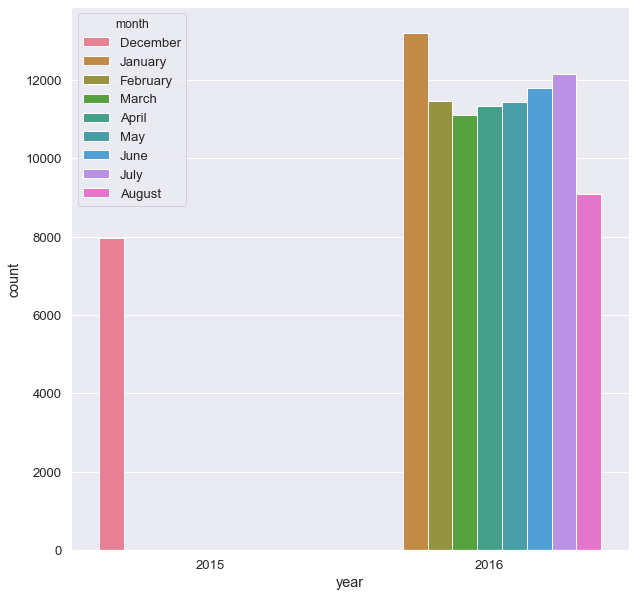

In [64]:
sns.countplot(x='year', data=emerg, hue='month', palette='husl')

## By plotting the call type across the days, the traffic are considered the lowest in Saturday and Sunday since the 2 latter days are holidays so not many cars are crowded in the morning and afternoon. It seems also, having fire as an emergency is not much related to the days 

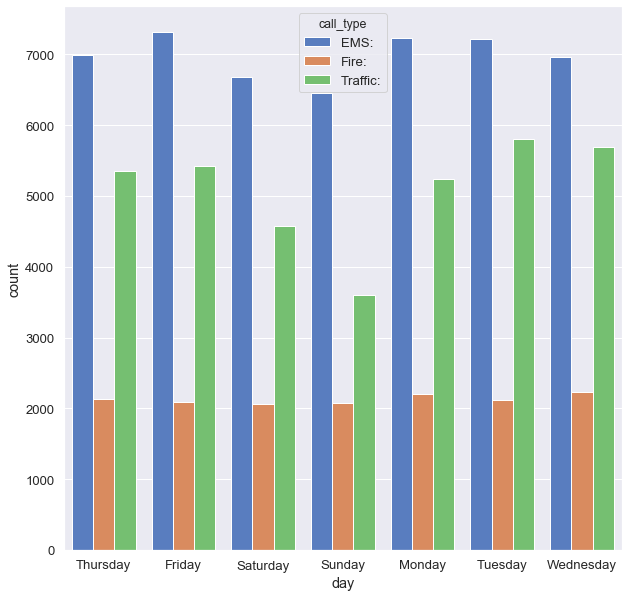

In [66]:
sns.countplot(x='day', data=emerg, hue='call_type', palette='muted')